In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix   # classification metricleri
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [81]:
df = pd.read_csv("Training Data.csv")
df.drop("Id", axis=1, inplace=True)

In [82]:
le = LabelEncoder()
df = df.apply(le.fit_transform)

In [83]:
X= df.drop(["Risk_Flag"], axis=1)
y= df["Risk_Flag"]

In [89]:
from pydantic_settings import BaseSettings
from pandas_profiling import ProfileReport

# Generate a Pandas Profiling report
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# To display the report in a Jupyter Notebook:
profile.to_notebook_iframe()

# To save the report as an HTML file:
profile.to_file("pandas_profiling_report.html")


import sweetviz as sv

# Generate a Sweetviz report
report = sv.analyze(df)

# To display the report:
report.show_html("sweetviz_report.html")  # Save and open the report in a browser

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


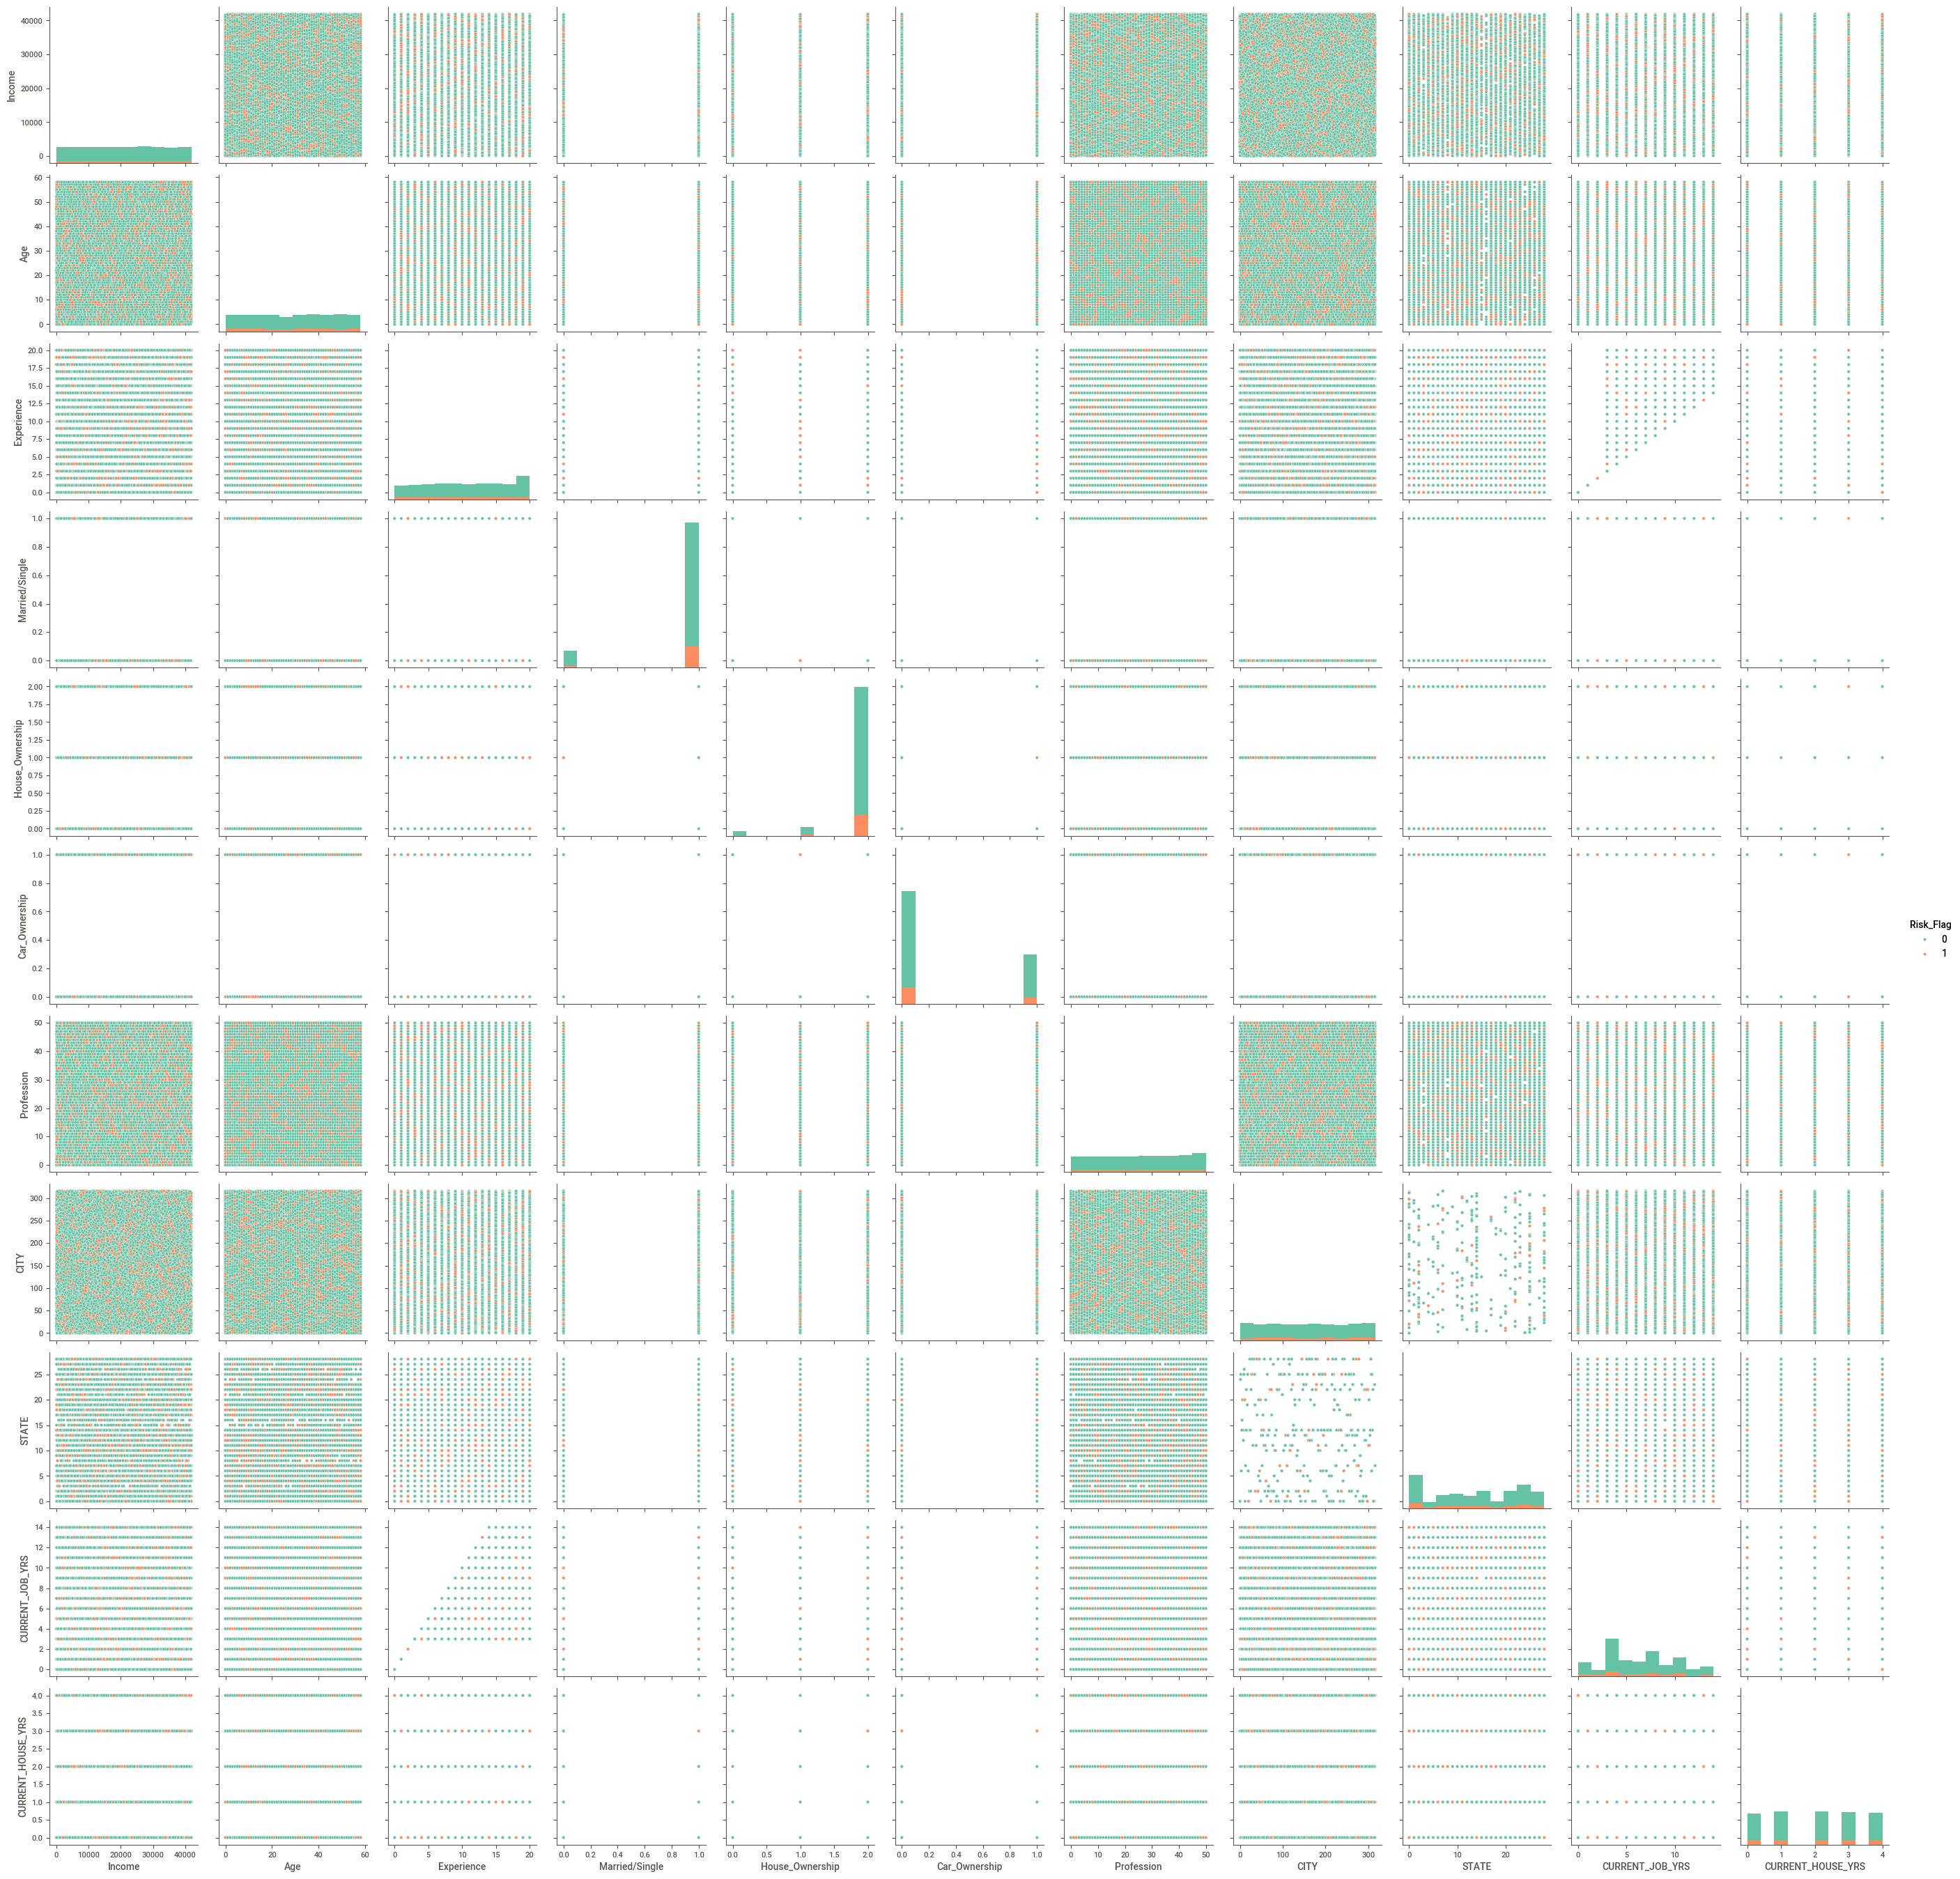

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize pairwise relationships in the dataset using PairGrid
g = sns.PairGrid(df, hue="Risk_Flag", palette="Set2")
g = g.map_diag(plt.hist)
g = g.map_offdiag(sns.scatterplot)
g = g.add_legend()

plt.show()

In [91]:

# # Group by Profession and Risk_Flag, then count the occurrences
# risk_flag_counts = df.groupby(['Profession', 'Risk_Flag']).size().unstack(fill_value=0)

# # Rename columns for clarity
# risk_flag_counts.columns = ['Risk_Flag_0', 'Risk_Flag_1']

# # Display the result
# risk_flag_counts.sort_values(by='Risk_Flag_1', ascending=False, inplace=True)
# print(risk_flag_counts)

In [92]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_smote).value_counts())

Class distribution after SMOTE:
Risk_Flag
0    221004
1    221004
Name: count, dtype: int64


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, stratify=y, random_state=101)
print(X_train.head())
print(y_train.head())

print(X_test.head())
print(y_test.head())

ValueError: Found input variables with inconsistent numbers of samples: [442008, 252000]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of correlations
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

In [ ]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_Recall", mode = "max", verbose = 1, patience = 5, restore_best_weights = True)

In [ ]:
tf.random.set_seed(420)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train_scaled.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

model

In [ ]:
model.fit(x = X_train_scaled, y = y_train, validation_split = 0.1, batch_size = 16, epochs = 100, sample_weight=classes_weights, callbacks = [early_stop], verbose=1)


In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))